In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from yellowbrick.regressor import ResidualsPlot 

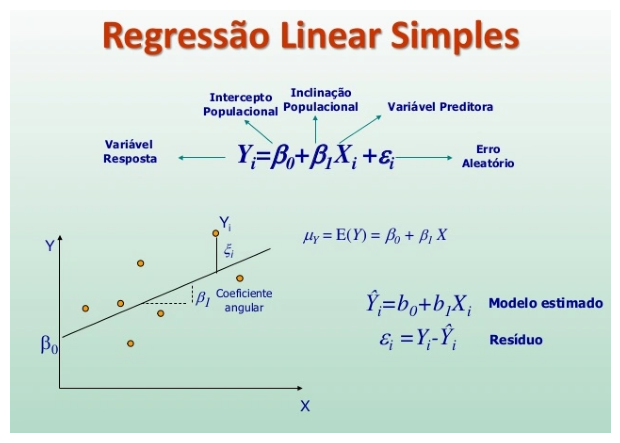

In [86]:
import matplotlib.image as img

imagem = img.imread('regresso-linear.webp')
plt.imshow(imagem)
plt.axis('off') 
plt.show()

In [87]:
base = pd.read_csv('cars.csv')
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [88]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [89]:
X = base.iloc[:, 1].values
Y = base.iloc[:, 0].values
X

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [90]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1) 
X

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]], dtype=int64)

In [91]:
modelo = LinearRegression()
modelo.fit(X, Y)

LinearRegression()

In [92]:
# Visualização dos coeficientes
modelo.intercept_

8.283905641787172

In [93]:
# inclinacao
modelo.coef_

array([0.16556757])

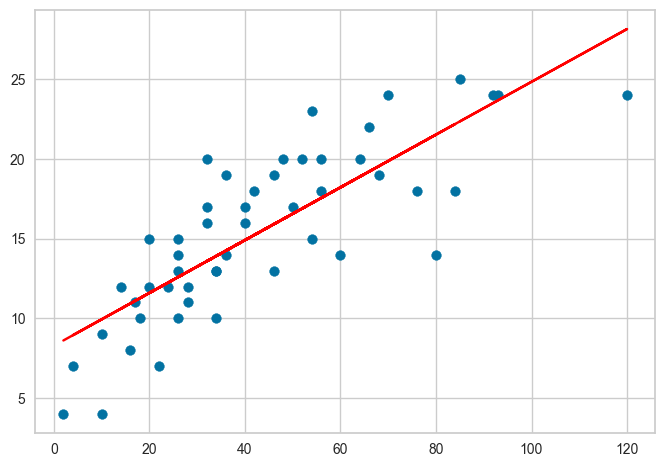

In [94]:
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')

In [95]:
# Previsão da "distância 22 pés" usando a fórmula manual
# interceptação * inclinação * valor de dist
# Qual velocidade se levou 22 pés pra parar?
modelo.intercept_ + modelo.coef_ * 22

# Previsão utilizando função do sklearn
modelo.predict([[22]])

array([11.92639228])

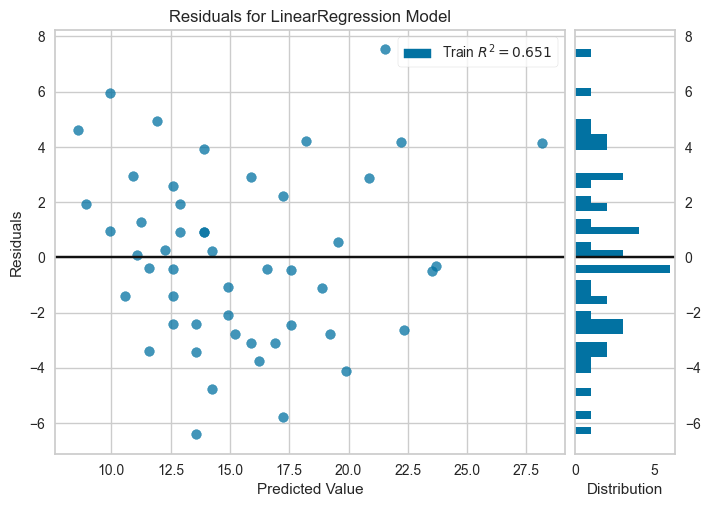

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [96]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, Y)
visualizador.poof()